##Importing The Libraries

In [49]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


In [50]:
tf.__version__

'2.9.2'

In [51]:
dataset= pd.read_excel('Churn_Modelling.xlsx')#verisetini koda ekledik

In [52]:
dataset.isna()#herhangi bir satır veya sütunda veri kaybı yok.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
dataset.isna().any()#sütunlarda herhangi bir veri kaybı yok

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [54]:
#sütunların datatiplerini getiren bir komut.
#iki print aynı anda çıktı olarak gözükebiliyor. Sadece X ve y olarak belirtseydim en son hangisini yazdıysam onun çıktısını görecektim.
print(dataset.dtypes)


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [55]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [56]:
dataset[['CreditScore',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']].describe() #belirtilen sütunların istatistiki açıklaması

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [57]:
print(dataset['Surname'].unique())#Unique surname'leri döndürür
print()
print(len(dataset['Surname'].unique()))#Unique surname'lerin sayısını döndürür

['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']

2932


Text(0, 0.5, 'Müşteri sayısı')

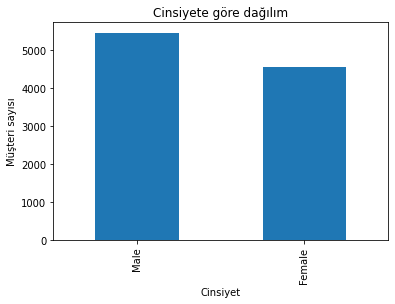

In [58]:
dataset['Gender'].value_counts().plot(kind="bar")
plt.title('Cinsiyete göre dağılım')
plt.xlabel('Cinsiyet')
plt.ylabel('Müşteri sayısı')


Text(0, 0.5, 'Müşteri sayısı')

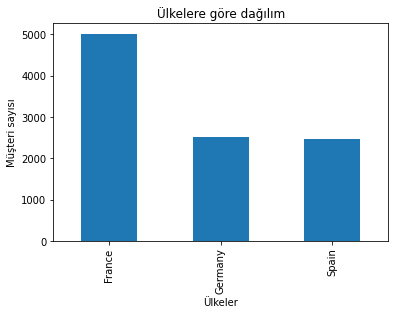

In [59]:
dataset['Geography'].value_counts().plot(kind="bar")
plt.title('Ülkelere göre dağılım')
plt.xlabel('Ülkeler')
plt.ylabel('Müşteri sayısı')

In [60]:
X= dataset.iloc[: , 3:-1].values 
y= dataset.iloc[: , -1].values

In [61]:
print(X)
print()
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]

[1 0 1 ... 1 1 0]


Verilen sütun bilgisiyle bankada var olma ya da olmama durumunu karşılaştırma(yorumlama yapmak amaçlı)

Text(0, 0.5, 'Exited')

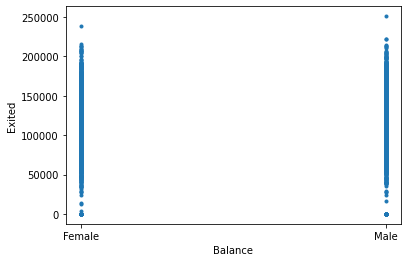

In [62]:
plt.plot(dataset.Gender ,dataset.Balance , '.')
plt.xlabel('Balance')
plt.ylabel('Exited')

Encoding Categical Data

Label Encoding The Gender Column


In [63]:
#Missing datamız olmadığı için ecoding işlemine başlayabiliriz. 
#gender için encoding yapıyoruz.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[: , 2] = le.fit_transform(X[: , 2])
#Bunun sonucunda female 0, male 1 değerlerini aldı.

One Hot Encoding The Geography Column

In [64]:
#Veri setinde 3 farklı ülke olduğu için, onları one hot encoding işlemiyle 
#uygun hale getiriyoruz.
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])],remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [65]:
print(X)
#One hot encoding işleminden sonra ülkeler 1.0.0, 0.1.0, 0.0.1 olarak
#ifade edildiği için onlar en başa geçiyorlar sütun olarak.

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


##Splitting The Dataset Into the Training set and Test set


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

##Feature Calling

In [216]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [217]:
X_test.mean()

0.007485892030906399

##BUILDING THE ANN

In [218]:
ann=tf.keras.models.Sequential()

In [219]:
#ilk hidden layer 2n+1 nöron
ann.add(tf.keras.layers.Dense(units=21, activation='relu'))

In [220]:
#ikinci hidden layer 2n+1
#ann.add(tf.keras.layers.Dense(units=21, activation= 'tanh'))

In [221]:
#output layer
ann.add(tf.keras.layers.Dense(units= 1, activation='relu'))

##Compiling The ANN

In [222]:
ann.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [223]:
y_train.shape

(8000,)

In [224]:
ann.fit(X_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 2.0260 - accuracy: 0.6967
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 1.2970 - accuracy: 0.7369
Epoch 3/10
250/250 [==============================] - 0s 2ms/step - loss: 1.1611 - accuracy: 0.7534
Epoch 4/10
250/250 [==============================] - 0s 2ms/step - loss: 1.0325 - accuracy: 0.7688
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.9688 - accuracy: 0.7389
Epoch 6/10
250/250 [==============================] - 0s 2ms/step - loss: 0.8151 - accuracy: 0.7546
Epoch 7/10
250/250 [==============================] - 0s 2ms/step - loss: 0.7182 - accuracy: 0.7822
Epoch 8/10
250/250 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.7901
Epoch 9/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5990 - accuracy: 0.7782
Epoch 10/10
250/250 [==============================] - 0s 2ms/step - loss: 0.5939 - accuracy: 0.7901

In [225]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

##Making Predictions

In [226]:
#False ise müşteri hala bankada
#True ise bankadan ayrılmış
print(ann.predict(sc.transform([[0, 1, 0, 0, 1, 40, 3, 0, 0, 1, 0, 500]])))


1/1 [==============================] - 0s 48ms/step
[[23.04341]]


In [227]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [228]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Accuracy Score:",accuracy_score(y_test, y_pred)*100)

[[1446  149]
 [ 294  111]]
Accuracy Score: 77.85
